Rezolvati una dintre urmatoarele probleme folosind un algoritm de cautare neinformata si un algoritm de cautare informata (la alegere):

- Problema 8-puzzle
- Problema canibalilor si misionarilor
- Problema depasarii Arad-Bucuresti
- ...



Pasi rezolvare:


1.   Definiti graful de stari.
  
  a. Ce informatii trebuie retinute in fiecare nod?
  
  b. Cum se definesc arcele intre noduri / tranzitiile? Care sunt actiunile posibile?
  
  c. Care este starea initiala si care este starea finala?
  
  d. Exista costuri asociate arcelor? (altfel, costul fiecarui arc va fi 1)





## Exercitii



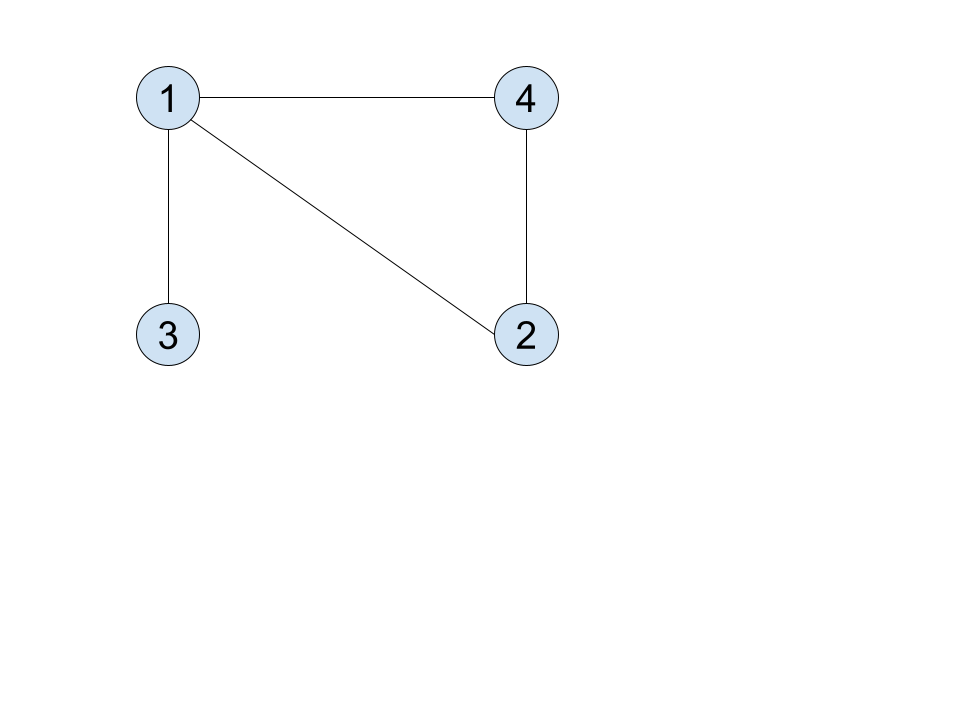

Scrieti o functie `succesor()` care, fiind dat un nod din graf reprezentat ca o matrice de adiacenta, sa returneze toate nodurile accesibile direct din el (vecinii). Luati ca exemplu graful de mai sus si apelati functia pe matricea lui.

In [ ]:
def succesor(mo, n):
  succesori = []
  for j in range(len(mo)):
    if mo[n-1][j] > 0:
      succesori.append(j+1)
  return succesori

In [ ]:
m=[
    [0,1,1,1],
    [1,0,0,1],
    [1,0,0,0],
    [1,1,0,0],
  ]

In [ ]:
print(succesor(m, 2))

[1, 4]


Pentru problema intoarcerii clatitelor (vezi curs), definiti un mod de a reprezenta starile din graf, reprezentati starea initiala din imaginea de mai jos si retineti-o intr-o variabila, si scrieti functii potrivite pentru: `succesor()` si `test_scop()`.
Afisati starile in care se poate ajunge din 2 pasi pornind din starea initiala, si verificati daca sunt stari scop.

Actiunile valide sunt intoarcerea clatitelor din varful turnului cu o spatula. Se pot intoarce oricate clatite, de la 2 pana la maximul de clatite din turn.
Presupunem ca avem 4 clatite in total, cu diametrele: 1, 2, 3 si 4.
Scopul este sa ajungem in final cu turnul de clatite ordonat de la mic la mare (cea mai mare clatita la baza si cea mai mica in varf).

Folositi-va de o functie  `afisare_stare(s)` care sa afiseze starea curenta intr-un mod intuitiv la alegere.

Stare initiala: 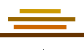

In [ ]:
# Vom reprezenta starile ca liste ordonate de numere intregi (mai precis, vor functiona ca stive), unde
# fiecare element din lista reprezinta diametrul unei clatite din turn,
# in ordine de jos in sus (de la baza spre varf)

stare_initiala = [4, 2, 3, 1]

# Fiind data o stare s, returneaza celelalte stari in care pot ajunge prin tranzitii/actiuni din s.
# Fiind mai multe stari posibile, le putem returna grupate intr-o lista de stari.
def succesor(s):
  stari_succesor = []
  for cutoff in range(2, len(s)+1): # in cutoff vom retine cate clatite intoarcem cu spatula
    varful_stivei = s[len(s)-cutoff : len(s)] # luam o portiune din stiva s, si anume incepand de la clatita de la pozitia din varf - nr de clatite intoarse, pana la varf
    varful_stivei_intors = varful_stivei[::-1] # astfel se poate face inversarea elementelor unei liste in python
    baza_stivei = s[:len(s)-cutoff]
    stare_noua = baza_stivei + varful_stivei_intors
    stari_succesor.append(stare_noua)
  return stari_succesor

def test_scop(s):
  # O stare este scop daca toate clatitele sunt ordonate:
  # orice clatita din stiva are diametrul mai mic decat orice clatita de sub ea.
  # Altfel spus, orice clatita trebuie sa fie mai mica decat cea de sub ea.
  for i in range(len(s)-1, 1, -1): # o luam invers de la sfarsitul listei la inceput, excluzand pozitia 0 (nu exista clatite sub ea)
    if s[i] > s[i-1]:
      return False # daca am gasit vreo pereche de stari in dezordine putem deja incheia functia cu False.
  # Daca am ajuns aici in functie inseamna ca nu am gasit nicio pereche de stari in dezordine si putem confirma ca este scop.
  return True

def afisare_stare(s):
  for diam in s[::-1]: # O iau de sus in jos in stiva, deci trebuie sa inversez lista
    liniute = ['-' for l in range(diam)]
    print("".join(liniute))




In [ ]:
# Putem defini o functie succesor care ne si da detalii despre mutarea facuta pentru a ajunge la fiecare succesor.
def succesor_cu_mesaj(s_cu_mesaj):
  s = s_cu_mesaj["stare"]
  stari_succesor = []
  for cutoff in range(2, len(s)+1): # in cutoff vom retine cate clatite intoarcem cu spatula
    varful_stivei = s[len(s)-cutoff : len(s)] # luam o portiune din stiva s, si anume incepand de la clatita de la pozitia din varf - nr de clatite intoarse, pana la varf
    varful_stivei_intors = varful_stivei[::-1] # astfel se poate face inversarea elementelor unei liste in python
    baza_stivei = s[:len(s)-cutoff]
    stare_noua = baza_stivei + varful_stivei_intors
    # Creez un dictionar care retine si stare si mesajul corespunzator
    stari_succesor.append({"stare": stare_noua, "mesaj": f'Am intors {cutoff} clatite'})  # String formatat (https://docs.python.org/3/tutorial/inputoutput.html)
  return stari_succesor

In [ ]:
print(succesor(stare_initiala))

[[4, 2, 1, 3], [4, 1, 3, 2], [1, 3, 2, 4]]


In [ ]:
print(succesor_cu_mesaj({"stare": stare_initiala, "mesaj": ""}))

[{'stare': [4, 2, 1, 3], 'mesaj': 'Am intors 2 clatite'}, {'stare': [4, 1, 3, 2], 'mesaj': 'Am intors 3 clatite'}, {'stare': [1, 3, 2, 4], 'mesaj': 'Am intors 4 clatite'}]


In [ ]:
afisare_stare(stare_initiala) # afisam starea ca o "stiva" desenata cu liniute

-
---
--
----


In [ ]:
# Parcurgem doi pasi din starea initiala:
# Obs: in rezolvarea problemelor nu vom trece prin stari in acest mod "manual",
# ci vom folosi algoritmii de parcurgere invatati
s = {"stare": stare_initiala, "mesaj": ""}
succesori1 = succesor_cu_mesaj(s)
for s1 in succesori1: # primul pas
  print(s1["mesaj"]) # afisez mutarea
  print("starea", s1["stare"], "este stare scop?", stare_scop(s1["stare"]))
  print("Starea curenta afisata grafic: ")
  afisare_stare(s1["stare"])
  succesori2 = succesor_cu_mesaj(s1)
  for s2 in succesori2: # al doilea pas
    print(s2["mesaj"])
    print("starea", s2["stare"], "este stare scop?", stare_scop(s2["stare"]))
    print("Starea curenta afisata grafic: ")
    afisare_stare(s2["stare"])

Am intors 2 clatite
starea [4, 2, 1, 3] este stare scop? False
Starea curenta afisata grafic: 
---
-
--
----
Am intors 2 clatite
starea [4, 2, 3, 1] este stare scop? False
Starea curenta afisata grafic: 
-
---
--
----
Am intors 3 clatite
starea [4, 3, 1, 2] este stare scop? False
Starea curenta afisata grafic: 
--
-
---
----
Am intors 4 clatite
starea [3, 1, 2, 4] este stare scop? False
Starea curenta afisata grafic: 
----
--
-
---
Am intors 3 clatite
starea [4, 1, 3, 2] este stare scop? False
Starea curenta afisata grafic: 
--
---
-
----
Am intors 2 clatite
starea [4, 1, 2, 3] este stare scop? False
Starea curenta afisata grafic: 
---
--
-
----
Am intors 3 clatite
starea [4, 2, 3, 1] este stare scop? False
Starea curenta afisata grafic: 
-
---
--
----
Am intors 4 clatite
starea [2, 3, 1, 4] este stare scop? False
Starea curenta afisata grafic: 
----
-
---
--
Am intors 4 clatite
starea [1, 3, 2, 4] este stare scop? False
Starea curenta afisata grafic: 
----
--
---
-
Am intors 2 clatite

In [ ]:
# Inversarea unei liste in python
l = [1, 2, 3]
print(l[::-1])

[3, 2, 1]


In [ ]:
# Slicing de liste in python
l = [1, 2, 3, 6, 2, 7, 5]
print(l[:5]) # primele 5 elemente
print(l[5:]) # elementele de la al 5lea pana la sfarsit (exclusiv)
print(l[2:5]) # elementele de la al 2lea la al 5lea (exclusiv)

[1, 2, 3, 6, 2]
[7, 5]
[3, 6, 2]


Implementati o versiune modificata a algoritmului BFS pentru parcurgerea grafului desenat mai sus astfel incat sa foloseasca functia succesor.

In [ ]:
def breadth_first(nod_start):

    c=[nod_start]
    explorate = [] # Nota: aici nu am mai folosit set() pentru ca nu putem pune elemente de tip lista intr-un set.
                  # Atunci ori folosim o lista simpla in loc de set(), ori reprezentam elementele ca tupluri in loc de liste (tuplurile pot fi in set-uri)

    while len(c)>0:
        #print("Coada actuala: " + str(c))
        nod_curent=c.pop(0)
        print("Starea vizitata:")
        afisare_stare(nod_curent)

        if test_scop(nod_curent):
            print("Am gasit o solutie.")
            break


        lSuccesori=succesor(nod_curent)
        for suc in lSuccesori:
          if suc not in c and suc not in explorate:  # Nota: apartenenta folosind "in" va functiona doar pentru anumite tipuri de date.
                                                    # Daca problema voastra cere o reprezentare mai complicata a starii (decat o lista)
                                                    # puteti scrie in schimb o functie `gasit` care sa verifice apartenenta (vezi mai jos)
            c.append(suc)

In [ ]:
breadth_first(stare_initiala)

Starea vizitata:
-
---
--
----
Starea vizitata:
---
-
--
----
Starea vizitata:
--
---
-
----
Starea vizitata:
----
--
---
-
Starea vizitata:
-
---
--
----
Starea vizitata:
--
-
---
----
Starea vizitata:
----
--
-
---
Starea vizitata:
---
--
-
----
Starea vizitata:
----
-
---
--
Starea vizitata:
--
----
---
-
Starea vizitata:
---
--
----
-
Starea vizitata:
---
-
--
----
Starea vizitata:
--
---
-
----
Starea vizitata:
----
--
---
-
Starea vizitata:
-
--
---
----
Am gasit o solutie.


In [ ]:
def gasit_liste(l1, l_mare):
  toate_egale = True
  for lista in l_mare:
    toate_egale = True
    for i in range(len(l1)):
      if l1[i] != lista[i]:
        toate_egale = False
      if i+1 < len(lista)-1:  # Nu am ajuns la sfarsitul listei din l_mare, e mai lunga decat l1
        toate_egale = False
    if toate_egale:
      return True
  return False

In [ ]:
print(gasit_liste([2,3], [[5,6,7], [2,3], [6,8]]))

True


In [ ]:
print([2,3] in [[5,6,7], [2,3], [6,8]])

True


Exercitiu nerezolvat: scrieti variante asemanatoare ale algoritmilor DFS, UCS, Greedy si A*, care folosesc functii `succesor`, `test_scop` si `afisare_stare` si, pe baza unei stari initiale, parcurg "arborele de cautare" (care nu va mai fi codificat explicit, cum am vazut la laboratorul anterior).


*Nota*: acest exercitiu nu se va nota ca parte din tema, insa rezolvarea lui este parte din rezolvarea mini-proiectului.
*Nota*: in functie de problema aleasa, puteti gandi moduri specifice pentru afisarea starii, generarea succesorilor, afisarea mutarilor etc. Afisarea mutarilor si a drumului este optionala, insa cu cat solutia este mai intuitiv descrisa pentru problema aleasa, cu atat mai bine.

Nota: pentru algoritmii de cautare informata, veti avea nevoie si de o functie `euristica(s)` care sa va dea valoarea euristicii pentru fiecare stare. Puteti alege ce euristica vreti, aveti grija sa fie admisibila (putem discuta la prezentari cum ati gandit alegerea).

In [ ]:
def test_scop(s):
    # Verifică dacă starea s este scopul problemei
    for i in range(len(s)-1, 1, -1):
        if s[i] > s[i-1]:
            return False
    return True

def afisare_stare(s):
    # Afisează starea s sub forma de grilă
    for diam in s[::-1]:
        liniute = ['-' for l in range(diam)]
        print("".join(liniute))

def DFS(nod_start):
    # Algoritmul de căutare în adâncime
    c=[nod_start]
    explorate = []

    while len(c)>0:
        nod_curent=c.pop()
        print("Starea vizitata:")
        afisare_stare(nod_curent)

        if test_scop(nod_curent):
            return nod_curent

        # Verifică dacă nodul a fost deja explorat
        if nod_curent not in explorate:
            explorate.append(nod_curent)

        # Generează succesorii nodului curent și îi adaugă în coadă dacă nu au fost deja explorați
        lSuccesori = succesor(nod_curent)
        for suc in lSuccesori:
            if suc not in c and suc not in explorate:
                c.append(suc)
